<a href="https://colab.research.google.com/github/hd-jung/SBA2/blob/main/kia_%EC%A3%BC%EC%8B%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas-datareader
!pip install prophet
!pip install matplotlib

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from prophet import Prophet
from pandas_datareader import data

In [ ]:
yf.pdr_override()

In [ ]:
start_date = '2015-03-10'
end_date = '2023-09-01'
kia = data.get_data_yahoo("003490.KS", start_date, end_date)
kia

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-10,43633.078125,44012.496094,42731.960938,42779.390625,41031.316406,364421
2015-03-11,42589.679688,42921.671875,41688.562500,41688.562500,39985.058594,540900
2015-03-12,41451.425781,42969.097656,40977.152344,42542.253906,40803.867188,572992
2015-03-13,43158.808594,43490.796875,41166.863281,41593.707031,39894.078125,709642
2015-03-16,42210.261719,44818.761719,41973.125000,44107.351562,42305.007812,954998
...,...,...,...,...,...,...
2023-08-25,23100.000000,23250.000000,23100.000000,23150.000000,23150.000000,471953
2023-08-28,23350.000000,23400.000000,23150.000000,23150.000000,23150.000000,552539
2023-08-29,23300.000000,23400.000000,23150.000000,23200.000000,23200.000000,593305


<Axes: xlabel='Date'>

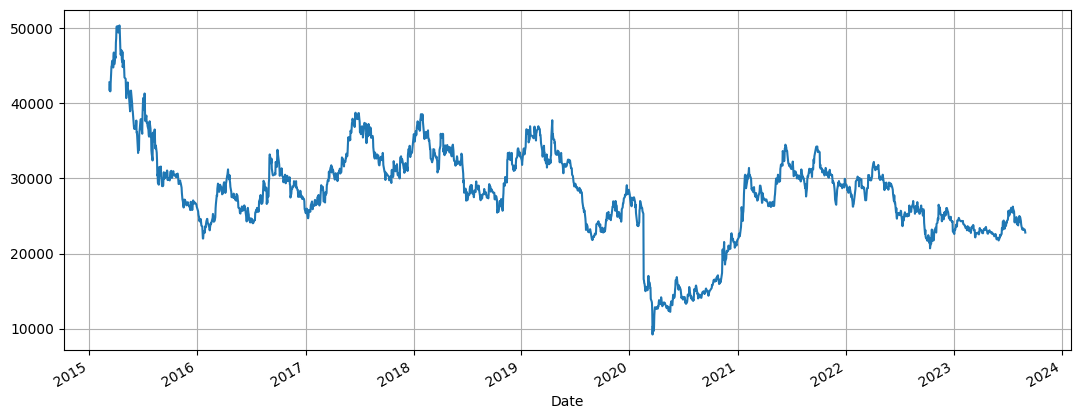

In [ ]:
# 종가 기준 데이터 분석
kia["Close"].plot(grid=True, figsize=(13,5))

In [ ]:
kia_tmp = kia[:"2023-09-01"]
kia_tmp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-25,23100.0,23250.0,23100.0,23150.0,23150.0,471953
2023-08-28,23350.0,23400.0,23150.0,23150.0,23150.0,552539
2023-08-29,23300.0,23400.0,23150.0,23200.0,23200.0,593305
2023-08-30,23400.0,23450.0,23050.0,23050.0,23050.0,809173
2023-08-31,23100.0,23150.0,22700.0,22800.0,22800.0,1141081


In [ ]:
kia_trunc = pd.DataFrame({
    "ds":kia_tmp.index,
    "y" :kia_tmp["Close"]
})
kia_trunc.reset_index(inplace=True)
del kia_trunc["Date"]
# kia_trunc.tail()

In [ ]:
kia_trunc

,ds,y
0,2015-03-10,42779.390625
1,2015-03-11,41688.562500
2,2015-03-12,42542.253906
3,2015-03-13,41593.707031
4,2015-03-16,44107.351562
...,...,...
2083,2023-08-25,23150.000000
2084,2023-08-28,23150.000000
2085,2023-08-29,23200.000000
2086,2023-08-30,23050.000000


In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(kia_trunc)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpidikvq58/8iigwie9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidikvq58/402_ju9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90639', 'data', 'file=/tmp/tmpidikvq58/8iigwie9.json', 'init=/tmp/tmpidikvq58/402_ju9a.json', 'output', 'file=/tmp/tmpidikvq58/prophet_model3546s01t/prophet_model-20230910154903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:49:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2143,2023-10-26,17897.354344,16604.488033,22830.069096,17684.095383,18098.749192,1727.357624,1727.357624,1727.357624,2931.060549,...,152.197993,152.197993,152.197993,-1355.900919,-1355.900919,-1355.900919,0.0,0.0,0.0,19624.711967
2144,2023-10-27,17884.539960,16775.512490,22910.156117,17651.361258,18104.337735,1812.800476,1812.800476,1812.800476,2931.060549,...,172.777558,172.777558,172.777558,-1291.037631,-1291.037631,-1291.037631,0.0,0.0,0.0,19697.340436
2145,2023-10-28,17871.725576,16231.100656,22240.184800,17631.861052,18102.401585,1344.104714,1344.104714,1344.104714,2931.060549,...,-366.382080,-366.382080,-366.382080,-1220.573755,-1220.573755,-1220.573755,0.0,0.0,0.0,19215.830290
2146,2023-10-29,17858.911192,16436.090142,22309.867925,17612.863063,18098.217858,1419.188087,1419.188087,1419.188087,2931.060549,...,-366.381804,-366.381804,-366.381804,-1145.490658,-1145.490658,-1145.490658,0.0,0.0,0.0,19278.099279
2147,2023-10-30,17846.096809,17071.761962,22799.066870,17584.912320,18100.765080,1992.340775,1992.340775,1992.340775,2931.060549,...,128.131921,128.131921,128.131921,-1066.851695,-1066.851695,-1066.851695,0.0,0.0,0.0,19838.437584


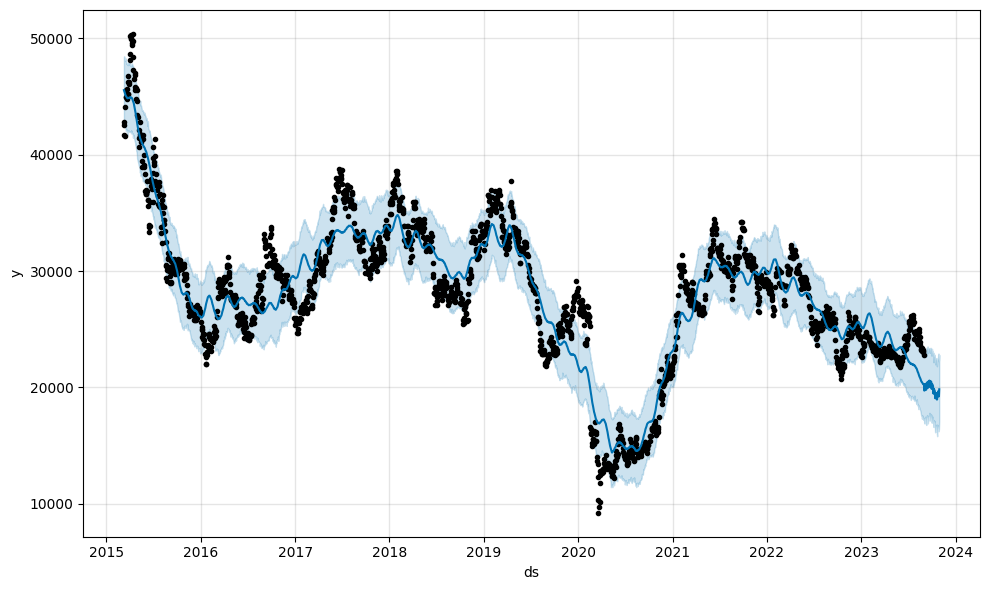

In [ ]:
m.plot(forecast[["ds","yhat","yhat_upper","yhat_lower"]]);
# 파란색 실선 > 예측데이터


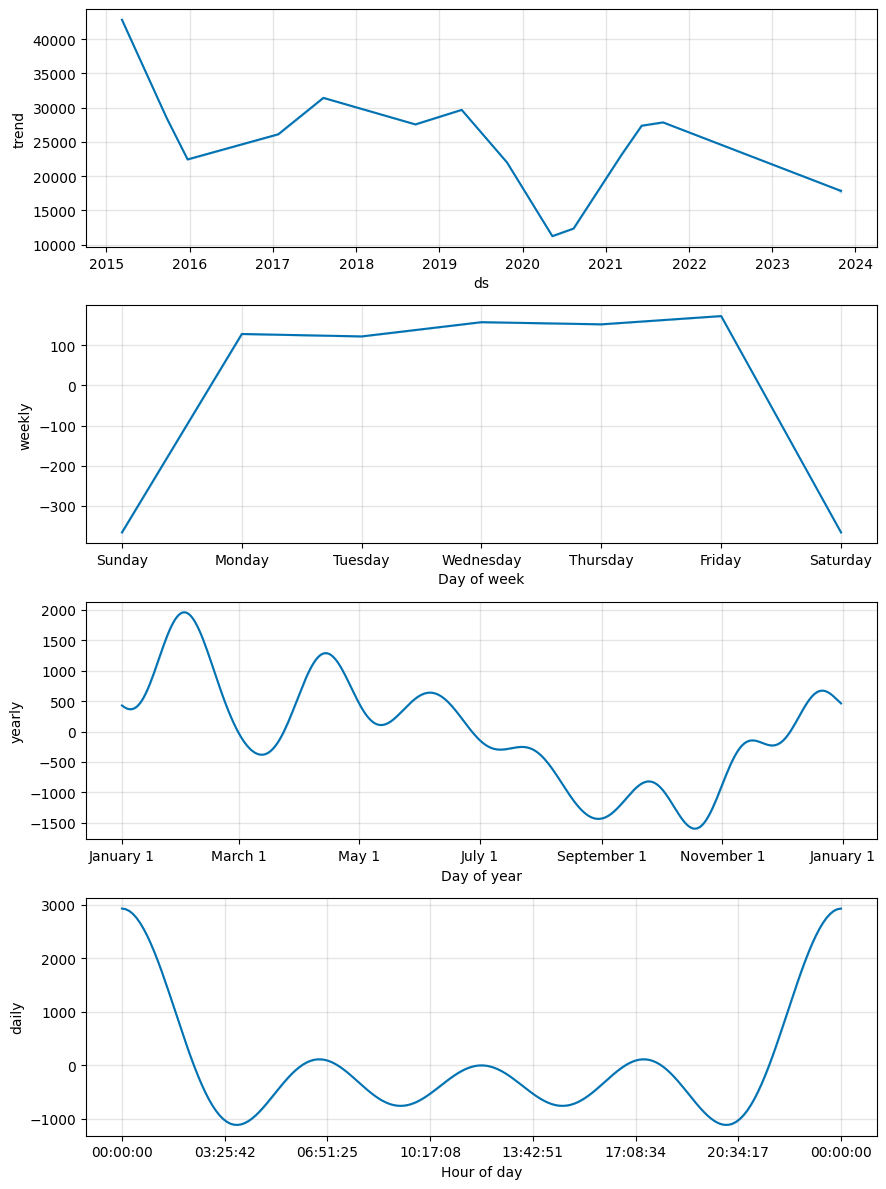

In [ ]:
# 트랜드 확인
m.plot_components(forecast);

In [ ]:
%matplotlib inline

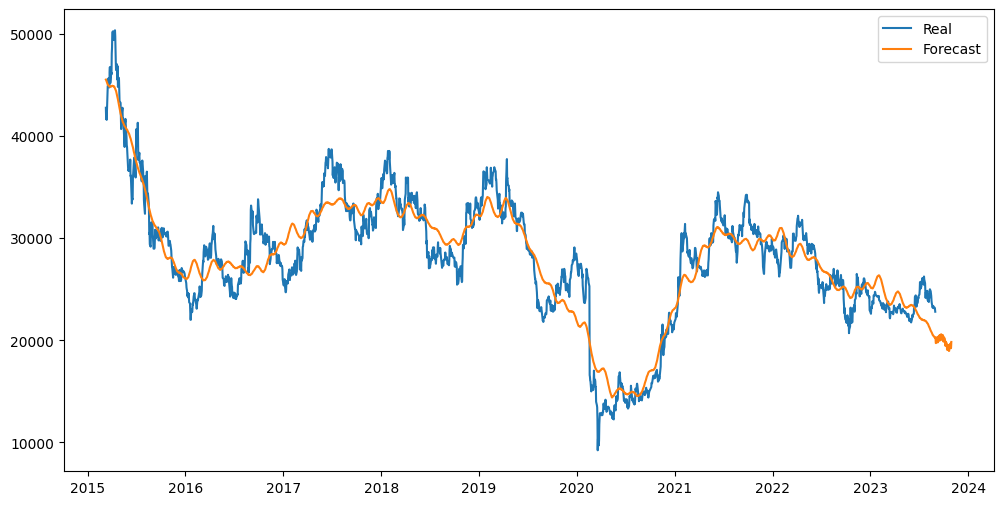

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(kia.index, kia["Close"], label="Real")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast")
plt.legend()
plt.show()